In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# sns.set()
%matplotlib inline

In [2]:
hitters_df = pd.read_csv('../data/Hitters.csv', index_col=0)
print(hitters_df.shape)
hitters_df.head()

(263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(hitters_df, test_size=0.2, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeRegressor

X1 = train[['Years', 'Hits']]
y1 = train['Salary']

dtr = DecisionTreeRegressor(max_depth=2).fit(X1, y1)

In [5]:
## let's visualize the decision tree
from sklearn import tree
dtr_text = tree.export_text(dtr, feature_names=X1.columns.to_list())
print(dtr_text)

|--- Years <= 4.50
|   |--- Years <= 3.50
|   |   |--- value: [151.10]
|   |--- Years >  3.50
|   |   |--- value: [345.39]
|--- Years >  4.50
|   |--- Hits <= 117.50
|   |   |--- value: [472.25]
|   |--- Hits >  117.50
|   |   |--- value: [976.52]



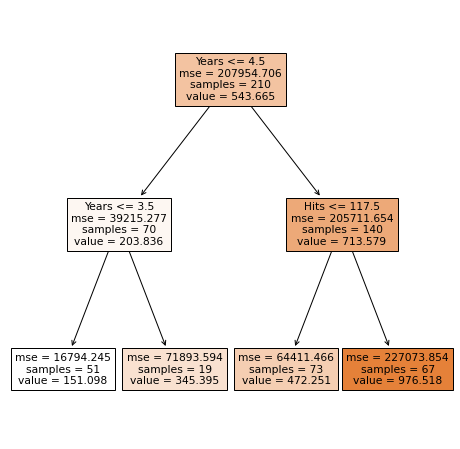

In [6]:
fig = plt.subplots(1,1, figsize=(8,8))
_ = tree.plot_tree(dtr, feature_names=X1.columns.to_list(),
                   filled=True) # doesn't show arrows with sns.set()

In [7]:
y1.mean(), (y1[X1['Years'] < 4.5]).mean(), y1[X1['Years'] >= 4.5].mean()

(543.6646238095238, 203.8357142857143, 713.5790785714286)

In [8]:
# let's visualize the dtree as contours
x2 = np.linspace(X1['Hits'].min(), X1['Hits'].max(), 100)
x1 = np.linspace(X1['Years'].min(), X1['Years'].max(), 100)
xx, yy = np.meshgrid(x1, x2)
print(xx.shape, yy.shape)

(100, 100) (100, 100)


<AxesSubplot:xlabel='Years', ylabel='Hits'>

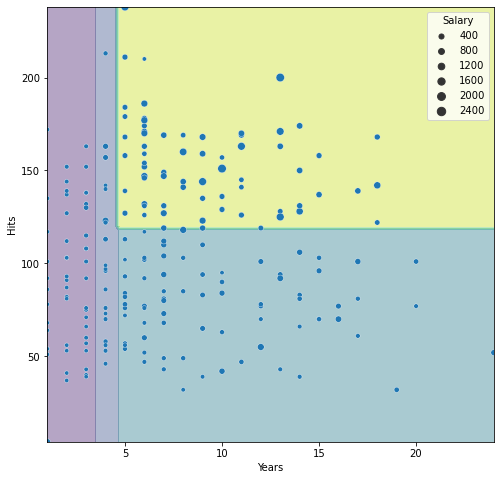

In [9]:
X1_new = np.c_[xx.ravel(), yy.ravel()]
z = dtr.predict(X1_new).reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(xx, yy, z, alpha=0.4)
ax.set_xlabel('Years')
ax.set_ylabel('Hits')
sns.scatterplot(x=X1['Years'], y=X1['Hits'], size=y1, ax=ax)

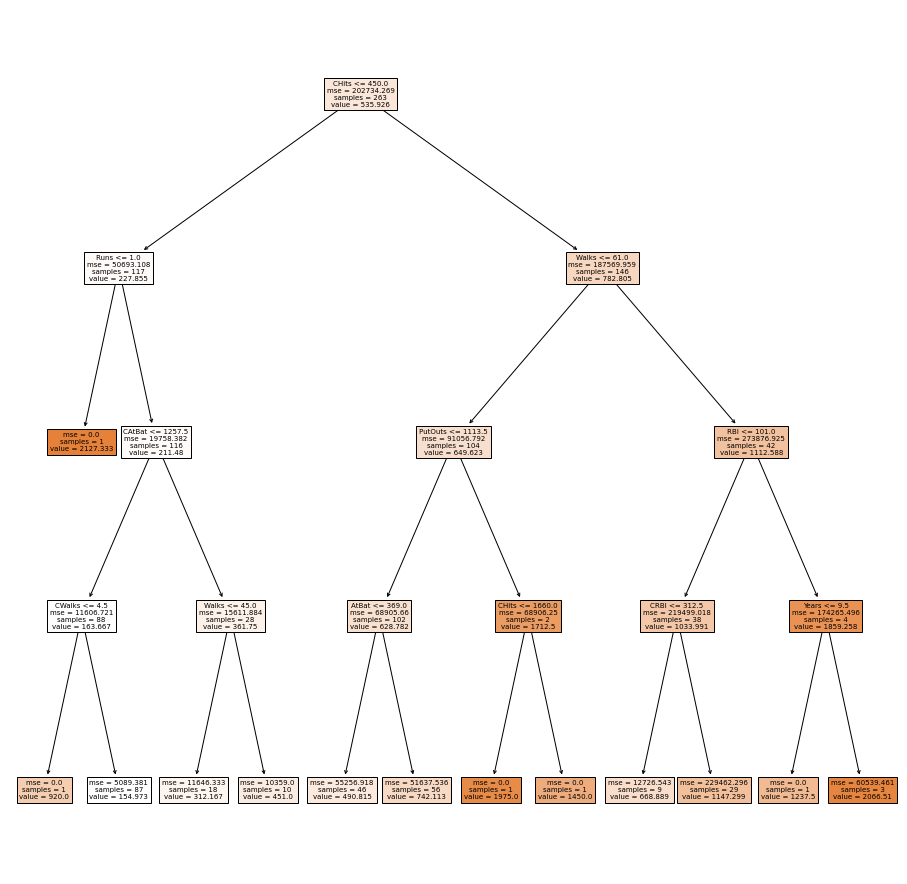

In [10]:
# figure 8.4: full tree
# dtrees don't seem to work with qualitative data, so dropping them (for now)
X = hitters_df.drop(columns=['Salary', 'League', 'Division', 'NewLeague'])
y = hitters_df['Salary']
dtr_full = DecisionTreeRegressor(max_depth=4).fit(X, y)
fig = plt.subplots(1,1, figsize=(16, 16))
_ = tree.plot_tree(dtr_full, feature_names=X.columns.to_list(),
                   filled=True) # doesn't show arrows with sns.set()

### Figure 8.8 Bagging and RF on the Heart data set

In [11]:
heart_df = pd.read_csv('../data/Heart.csv', index_col=0)
heart_df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [12]:
heart_df.isna().sum(axis=0) # number of NaNs

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [13]:
# let's drop NaNs
heart_df = heart_df.dropna()

In [14]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
heart_df.ChestPain.value_counts()

asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: ChestPain, dtype: int64

In [16]:
heart_df.Thal.value_counts()

normal        164
reversable    115
fixed          18
Name: Thal, dtype: int64

In [17]:
# Bagging & Random Forest clfs don't seem to be working with qualitative data
heart_df_dummy = pd.get_dummies(heart_df, columns=['ChestPain', 'Thal'], drop_first=True)
# heart_df_dummy['AHD'] = heart_df['AHD'] # AHD gets dropped from above
heart_df_dummy.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,No,0,0,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes,0,0,0,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,No,1,0,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,No,0,1,0,1,0


In [18]:
heart_train, heart_test = train_test_split(heart_df_dummy, test_size=0.2, random_state=42)
X = heart_train.drop(columns='AHD')
y = heart_train['AHD']
X_test = heart_test.drop(columns='AHD')
y_test = heart_test['AHD']

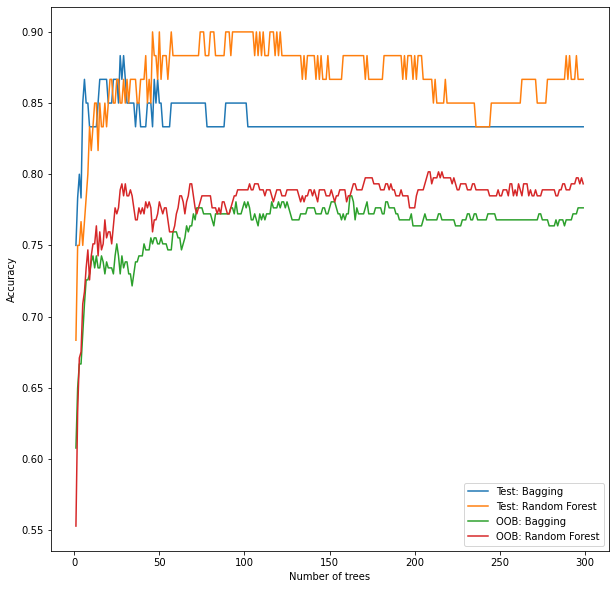

In [19]:
import warnings
warnings.filterwarnings("ignore")

dtree = DecisionTreeClassifier()
bag_clf = BaggingClassifier(base_estimator=dtree, random_state=42, oob_score=True)
rf_clf = RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=42)

bag_err, rf_err = [], []
bag_oob, rf_oob = [], []
for n_trees in range(1, 300):
    bag_clf.set_params(n_estimators=n_trees)
    rf_clf.set_params(n_estimators=n_trees)
    bag_clf.fit(X, y)
    rf_clf.fit(X, y)
    bag_err.append(bag_clf.score(X_test, y_test))
    rf_err.append(rf_clf.score(X_test, y_test))
    bag_oob.append(bag_clf.oob_score_)
    rf_oob.append(rf_clf.oob_score_)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(range(1, 300), bag_err, label='Test: Bagging')
ax.plot(range(1, 300), rf_err, label='Test: Random Forest')
ax.plot(range(1, 300), bag_oob, label='OOB: Bagging')
ax.plot(range(1, 300), rf_oob, label='OOB: Random Forest')
ax.set_xlabel('Number of trees')
ax.set_ylabel('Accuracy')
ax.legend()

<AxesSubplot:>

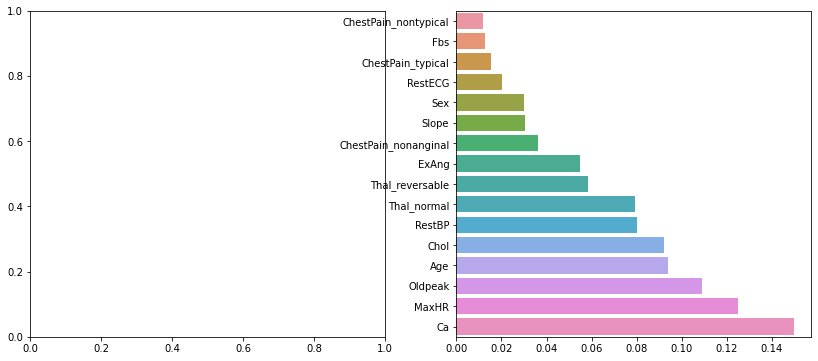

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# bag_clf doesn't have feature importance attribute
# bag_feat_imp = np.argsort(bag_clf.feature_importances_)
# sns.barplot(x=bag_clf.feature_importances_[bag_feat_imp], y=X.columns[bag_feat_imp], orient='h', ax=ax[0])

rf_feat_imp = np.argsort(rf_clf.feature_importances_)
sns.barplot(x=rf_clf.feature_importances_[rf_feat_imp], y=X.columns[rf_feat_imp], orient='h', ax=ax[1])

## Bossting

In [21]:
# from sklearn.ensemble import 

## Lab

### Decision trees on Carseats dataset

In [22]:
carseats_df = pd.read_csv('../data/Carseats.csv', index_col=0)
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [23]:
# unlike R, sklearn decision trees don't handle categorical predictors.
# They need to be encoded as numbers

# there are 3 categorical predictors above--ShelveLoc, Urban & US
# Urban & US are binary--so it is easy to encode them numerically
# ShelveLoc is ordinal, so we can encode it numerically. If it was NOT ordinal,
# then we SHOULDN'T encode it numerically. In that case, use one-hot encoding.

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [24]:
X_cat = carseats_df[['ShelveLoc', 'Urban', 'US']]
X_num = OrdinalEncoder().fit_transform(X_cat)
X_num[:5]

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 1., 0.]])

Above, for the predictor 'ShelveLoc', Bad is encoded as 0, Good as 1 and Medium as 2.

This doesn't make sense and looses the ordinality b/w Bad, Medium and Good.

In [25]:
shelve_loc_map = {'Bad': 0, 'Medium': 1, 'Good': 2}
shelve_loc_int = carseats_df['ShelveLoc'].map(lambda x: shelve_loc_map[x])
shelve_loc_int[:5]

1    0
2    2
3    1
4    1
5    0
Name: ShelveLoc, dtype: int64

In [26]:
# now let's encode 'Urban' and 'US' predictors using OrdinalEncoder
carseats_df[['Urban', 'US']] = OrdinalEncoder().fit_transform(carseats_df[['Urban', 'US']]).astype('int')
# carseats_df['US'] = OrdinalEncoder().fit_transform(carseats_df['US'])
carseats_df['ShelveLoc'] = shelve_loc_int
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,0,42,17,1,1
2,11.22,111,48,16,260,83,2,65,10,1,1
3,10.06,113,35,10,269,80,1,59,12,1,1
4,7.40,117,100,4,466,97,1,55,14,1,1
5,4.15,141,64,3,340,128,0,38,13,1,0


In [27]:
# convert 'Sales' to a categorical predictor 'High'
carseats_df['High'] = (carseats_df['Sales'] > 8)*1
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.50,138,73,11,276,120,0,42,17,1,1,1
2,11.22,111,48,16,260,83,2,65,10,1,1,1
3,10.06,113,35,10,269,80,1,59,12,1,1,1
4,7.40,117,100,4,466,97,1,55,14,1,1,0
5,4.15,141,64,3,340,128,0,38,13,1,0,0


In [28]:
cs_train, cs_test = train_test_split(carseats_df, test_size=0.2, random_state=42)
X_train, y_train = cs_train.drop(columns=['Sales', 'High']), cs_train['High']
X_test, y_test = cs_test.drop(columns=['Sales', 'High']), cs_test['High']

DT clf train error rate: 0.000
DT clf test  error rate: 0.219


<AxesSubplot:ylabel='Train'>

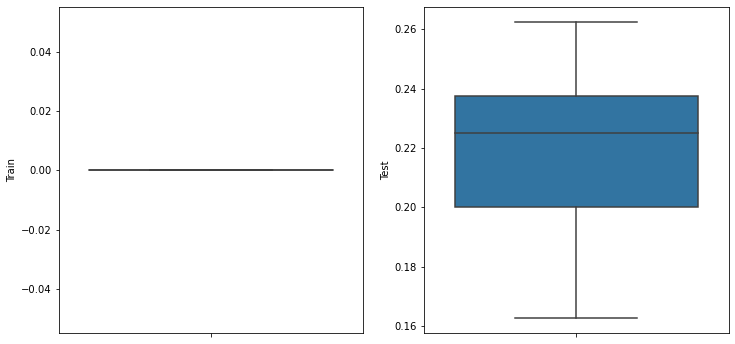

In [29]:
from sklearn.tree import DecisionTreeClassifier

# run decision tree clf 100 times and collect the mean train & test error rates
train_err, test_err = [], []
for iter in range(100):
    dt_clf = DecisionTreeClassifier().fit(X_train, y_train)
    train_err.append(np.mean(y_train != dt_clf.predict(X_train)))
    test_err.append(np.mean(y_test != dt_clf.predict(X_test)))

print('DT clf train error rate: {:.3f}'.format(np.mean(train_err)))
print('DT clf test  error rate: {:.3f}'.format(np.mean(test_err)))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
err = pd.DataFrame({'Train': train_err,
                    'Test': test_err})
sns.boxplot(y='Test', data=err, ax= ax[1])
sns.boxplot(y='Train', data=err, ax=ax[0])

Notice above the variance in test error rate--it varies from ~16% to 27%

Regularizing the tree (for ex. by specifying max_depth) will reduce variance and perhaps to better test error rate.

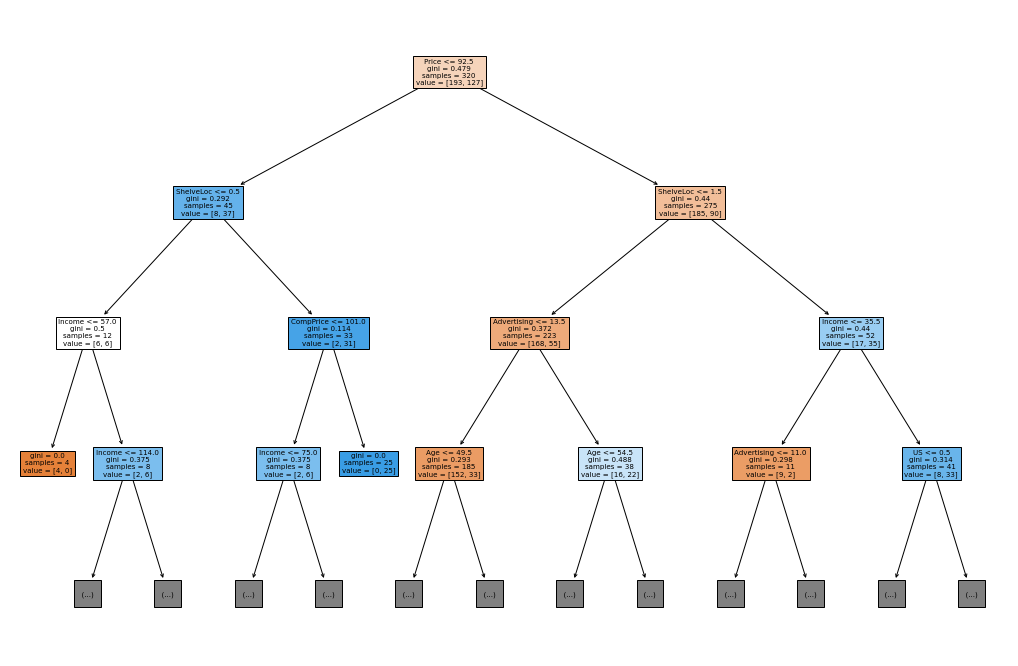

In [30]:
# let's plot the tree
fig, ax = plt.subplots(figsize=(18, 12))
_ = tree.plot_tree(dt_clf, feature_names=X_train.columns.to_list(),
                   max_depth=3, filled=True, ax=ax)

'Price' and 'ShelveLoc' seem to be important predictors as they appear at the top of the tree

### Regression trees on the Boston dataset

In [31]:
boston_df = pd.read_csv('../data/Boston.csv', index_col=0).dropna()
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
bos_train, bos_test = train_test_split(boston_df, test_size=0.2, random_state=42)
X_train, y_train = bos_train.drop(columns='medv'), bos_train['medv']
X_test, y_test = bos_test.drop(columns='medv'), bos_test['medv']

from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor().fit(X_train, y_train)
print(dt_reg.score(X_train, y_train), dt_reg.score(X_test, y_test)) # R2 score

err = (y_test.values - dt_reg.predict(X_test))
print('Test RMSE: ', np.sqrt(np.mean(err**2)))

1.0 0.842832514868185
Test RMSE:  3.3949501136997298


### Bagging and RF on the Boston dataset

In [33]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

bag_reg = BaggingRegressor(n_estimators=100).fit(X_train, y_train)
rf_reg = RandomForestRegressor(random_state=42).fit(X_train, y_train)

print('Bag Test RMSE: ', np.sqrt(np.mean((y_test - bag_reg.predict(X_test))**2)))
print('RF  Test RMSE: ', np.sqrt(np.mean((y_test - rf_reg.predict(X_test))**2)))

Bag Test RMSE:  3.022006707341281
RF  Test RMSE:  2.810963160939122


In [34]:
feat_imp = pd.DataFrame({'imp': rf_reg.feature_importances_,
              'feat': X_train.columns.to_list()})
feat_imp.sort_values('imp')

,imp,feat
3,0.001004,chas
1,0.001756,zn
8,0.003811,rad
2,0.007953,indus
11,0.012154,black
6,0.013840,age
4,0.015544,nox
9,0.015661,tax
10,0.016313,ptratio
0,0.038062,crim


## Excercises

### Conceptual

### 3. Gini and Entropy plots in a two class scenario

Text(0.5, 0, 'pm1')

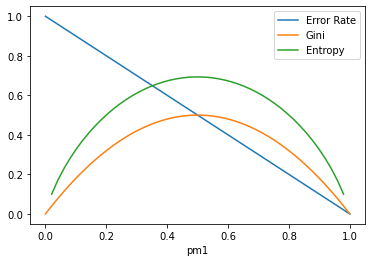

In [36]:
pm1 = np.linspace(0, 1, 50)
pm2 = 1 - pm1
error_rate = pm2
gini = 2 * pm1 * (1 - pm1)
entropy = -(pm1 * np.log(pm1) + pm2 * np.log(pm2))
fig, ax = plt.subplots()
ax.plot(pm1, error_rate, label='Error Rate')
ax.plot(pm1, gini, label='Gini')
ax.plot(pm1, entropy, label='Entropy')
ax.legend()
ax.set_xlabel('pm1')

### Applied
### 7 RF regression on Boston dataset

Text(0, 0.5, 'error rate')

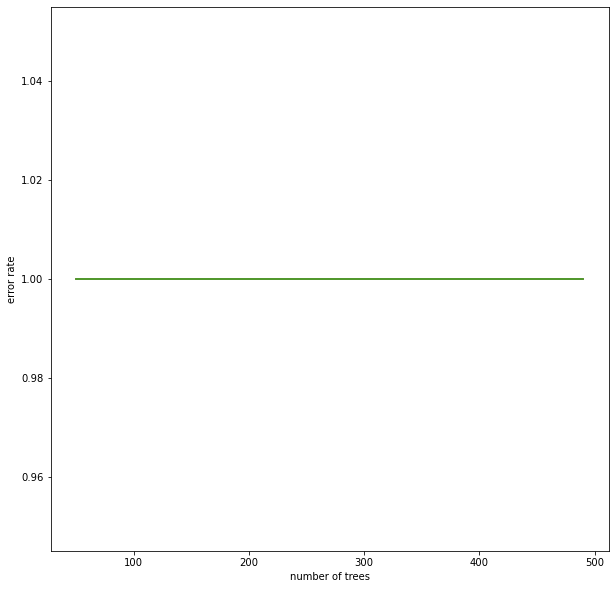

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
rf_reg = RandomForestRegressor(random_state=42)

n_trees = np.arange(50, 500, 10)
n_features = np.arange(1, len(boston_df.columns))

for f in n_features:
    rf_reg.set_params(max_features=f)
    err_rate = []
    for t in n_trees:
        rf_reg.set_params(n_estimators=t)
        rf_reg.fit(X_train, y_train)
        err_rate.append(np.mean(y_test != rf_reg.predict(X_test)))
    ax.plot(n_trees, err_rate, label='m={}'.format(f))

ax.set_xlabel('number of trees')
ax.set_ylabel('error rate')

### 8. Regression trees on the Carseats dataset

In [38]:
carseats_df = pd.read_csv('../data/Carseats.csv', index_col=0).dropna()
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [39]:
# unlike R, sklearn decision trees don't handle categorical predictors.
# They need to be encoded as numbers

# there are 3 categorical predictors above--ShelveLoc, Urban & US
# Urban & US are binary--so it is easy to encode them numerically
# ShelveLoc is ordinal, so we can encode it numerically. If it was NOT ordinal,
# then we SHOULDN'T encode it numerically. In that case, use one-hot encoding.

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

# now let's encode 'Urban' and 'US' predictors using OrdinalEncoder
carseats_df[['Urban', 'US']] = OrdinalEncoder().fit_transform(carseats_df[['Urban', 'US']]).astype('int')

shelve_loc_map = {'Bad': 0, 'Medium': 1, 'Good': 2}
shelve_loc_int = carseats_df['ShelveLoc'].map(lambda x: shelve_loc_map[x])
carseats_df['ShelveLoc'] = shelve_loc_int

carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,0,42,17,1,1
2,11.22,111,48,16,260,83,2,65,10,1,1
3,10.06,113,35,10,269,80,1,59,12,1,1
4,7.40,117,100,4,466,97,1,55,14,1,1
5,4.15,141,64,3,340,128,0,38,13,1,0


In [40]:
# 8.a
cs_train, cs_test = train_test_split(carseats_df, test_size=0.2, random_state=42)
X_train, y_train = cs_train.drop(columns=['Sales']), cs_train['Sales']
X_test, y_test = cs_test.drop(columns=['Sales']), cs_test['Sales']

0.40268312422537056


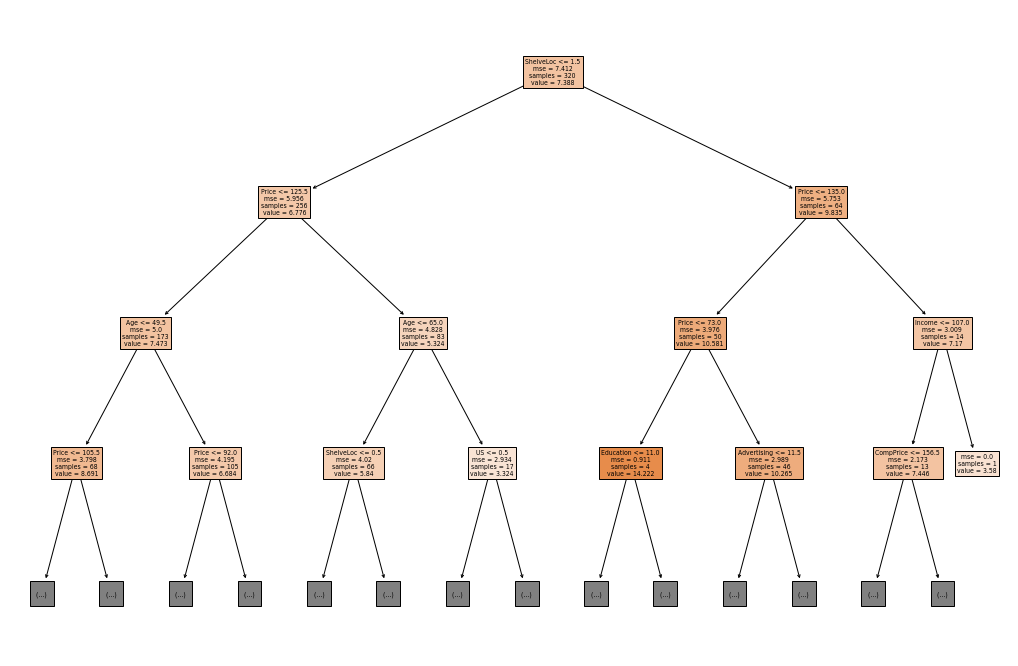

In [41]:
# 8.b
dtree = DecisionTreeRegressor().fit(X_train, y_train)
print(dtree.score(X_test, y_test))

# let's plot the tree
fig, ax = plt.subplots(figsize=(18, 12))
_ = tree.plot_tree(dtree, feature_names=X_train.columns.to_list(),
                   max_depth=3, filled=True, ax=ax)